In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch

In [2]:
df = pd.read_csv('data/csgo_games.csv')

**<span style="font-size: 18px;">№1. Пункт - определить количество строк и столбцов</span>**

In [3]:
df.shape

(3787, 170)

**<span style="font-size: 18px;">№1. Пункт - вывести первые несколько строк для ознакомления</span>**

In [4]:
df.head(10)

match_date       team_1       team_2  t1_points  t2_points  t1_world_rank  \
0  2016-12-18       CLOUD9  HELLRAISERS         13         16              9   
1  2016-12-18    IMMORTALS           G2         17         19             13   
2  2016-12-18  MOUSESPORTS    IMMORTALS         16          3             12   
3  2016-12-18     DIGNITAS           G2         16          9              6   
4  2016-12-18        OPTIC  HELLRAISERS         16         10              4   
5  2016-12-17         FAZE    IMMORTALS         16         11              8   
6  2016-12-17          NIP        OPTIC          9         16              3   
7  2016-12-17       CLOUD9    RENEGADES         16          9              9   
8  2016-12-17      GODSENT  HELLRAISERS         16         11             17   
9  2016-12-16         FAZE        OPTIC         16         11              8   

   t2_world_rank  t1_h2h_win_perc  t2_h2h_win_perc winner  ...  \
0             20         0.500000         0.500000     t2  ...   
1             10         0.500000         0.500000     t2  ...   
2             13         0.500000         0.500000     t1  ...   
3             10         0.416667         0.583333     t1  ...   
4             20         0.500000         0.500000     t1  ...   
5             13         0.500000         0.500000     t1  ...   
6              4         0.833333         0.166667     t2  ...   
7             19         0.800000         0.200000     t1  ...   
8             20         0.444444         0.555556     t1  ...   
9              4         0.200000         0.800000     t1  ...   

   t2_player5_dpr  t2_player5_spr  t2_player5_opk_ratio  \
0            0.63            0.10                  1.05   
1            0.69            0.09                  0.85   
2            0.67            0.07                  0.79   
3            0.69            0.09                  0.85   
4            0.63            0.10                  1.05   
5            0.66            0.07                  0.82   
6            0.66            0.08                  1.00   
7            0.66            0.11                  0.93   
8            0.67            0.10                  0.95   
9            0.65            0.08                  1.00   

   t2_player5_opk_rating  t2_player5_wins_perc_after_fk  \
0                   0.92                          0.733   
1                   0.96                          0.739   
2                   0.94                          0.723   
3                   0.96                          0.739   
4                   0.92                          0.733   
5                   0.96                          0.737   
6                   1.03                          0.737   
7                   0.97                          0.804   
8                   0.91                          0.774   
9                   1.03                          0.737   

   t2_player5_fk_perc_in_wins  t2_player5_multikill_perc  \
0                       0.104                   0.147018   
1                       0.147                   0.135810   
2                       0.129                   0.148257   
3                       0.147                   0.135810   
4                       0.104                   0.147018   
5                       0.135                   0.152679   
6                       0.149                   0.173077   
7                       0.135                   0.151456   
8                       0.112                   0.163958   
9                       0.149                   0.173550   

   t2_player5_rating_at_least_one_perc  t2_player5_is_sniper  \
0                                0.528                 False   
1                                0.438                  True   
2                                0.526                 False   
3                                0.438                  True   
4                                0.528                 False   
5                                0.557            

**<span style="font-size: 18px;">№1. Пункт - краткое описание датасета</span>**

<span style="color:rgb(182, 181, 181); font-size: 16px;">Основная информация о матче</span>

| Столбец       | Описание столбца       |
|---------------|------------------------|
| <span style="color:#00FF00">match_date</span> | Дата проведения матча |
| <span style="color:#00FF00">team_1</span>, <span style="color:#00FF00">team_2</span> | Названия команд-участниц |
| <span style="color:#00FF00">t1_points</span>, <span style="color:#00FF00">t2_points</span> | Количество очков/раундов каждой команды |
| <span style="color:#00FF00">t1_world_rank</span>, <span style="color:#00FF00">t2_world_rank</span> | Мировой рейтинг команд (число) |
| <span style="color:#00FF00">t1_h2h_win_perc</span>, <span style="color:#00FF00">t2_h2h_win_perc</span> | Процент побед в предыдущих встречах (Head-to-Head) |
| <span style="color:#00FF00">winner</span> | Победитель матча (t1 или t2) |

<span style="color:rgb(182, 181, 181); font-size: 16px;">Статистика игроков</span>

| Столбец       | Описание столбца       |
|---------------|------------------------|
| <span style="color:#00FF00">tY_playerX_rating</span> | Общий рейтинг игрока (HLTV 2.0) |
| <span style="color:#00FF00">tY_playerX_impact</span> | Влияние игрока на раунды (мультикиллы, открытия) |
| <span style="color:#00FF00">tY_playerX_kdr</span> | Соотношение убийств к смертям (Kill/Death Ratio) |
| <span style="color:#00FF00">tY_playerX_dmr</span> | Средний урон за раунд (Damage per Round) |
| <span style="color:#00FF00">tY_playerX_kpr</span> | Убийств за раунд (Kills per Round) |
| <span style="color:#00FF00">tY_playerX_apr</span> | Ассистов за раунд (Assists per Round) |
| <span style="color:#00FF00">tY_playerX_dpr</span> | Смертей за раунд (Deaths per Round) |
| <span style="color:#00FF00">tY_playerX_spr</span> | Спасений за раунд (Saves per Round) |
| <span style="color:#00FF00">tY_playerX_opk_ratio</span> | Эффективность в открытиях раундов |
| <span style="color:#00FF00">tY_playerX_opk_rating</span> | Рейтинг открытий (на основе OPK) |
| <span style="color:#00FF00">tY_playerX_wins_perc_after_fk</span> | % выигранных раундов после первого убийства |
| <span style="color:#00FF00">tY_playerX_fk_perc_in_wins</span> | % первых убийств в выигранных раундах |
| <span style="color:#00FF00">tY_playerX_multikill_perc</span> | % раундов с 2+ убийствами |
| <span style="color:#00FF00">tY_playerX_rating_at_least_one_perc</span> | % раундов с рейтингом ≥ 1.0 |
| <span style="color:#00FF00">tY_playerX_is_sniper</span> | Является ли снайпером (1/0) |
| <span style="color:#00FF00">tY_playerX_clutch_win_perc</span> | % выигранных клатч-ситуаций (1vsX) |

**<span style="font-size: 18px;">№1. Пункт - очистка данных</span>**

**<span style="font-size: 16px;">Подпункт - обработка пропущенных значений</span>**

<span style="color:rgb(182, 181, 181); font-size: 16px;">Просмотр стобцов с пропусками</span>

In [5]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

t1_player5_wins_perc_after_fk    2
t2_player3_wins_perc_after_fk    1
t2_player5_wins_perc_after_fk    1
dtype: int64

<span style="color:rgb(182, 181, 181); font-size: 16px;">Заполнение пропусков</span>

In [6]:
for col in [
    't1_player5_wins_perc_after_fk', 
    't2_player3_wins_perc_after_fk', 
    't2_player5_wins_perc_after_fk'
]:
    df[col] = df[col].fillna(df[col].median())

**<span style="font-size: 16px;">Подпункт - удаление дубликатов</span>**

<span style="color:rgb(182, 181, 181); font-size: 16px;">Проверка на дубликаты (дубликатов нет)</span>

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [match_date, team_1, team_2, t1_points, t2_points, t1_world_rank, t2_world_rank, t1_h2h_win_perc, t2_h2h_win_perc, winner, t1_player1_rating, t1_player1_impact, t1_player1_kdr, t1_player1_dmr, t1_player1_kpr, t1_player1_apr, t1_player1_dpr, t1_player1_spr, t1_player1_opk_ratio, t1_player1_opk_rating, t1_player1_wins_perc_after_fk, t1_player1_fk_perc_in_wins, t1_player1_multikill_perc, t1_player1_rating_at_least_one_perc, t1_player1_is_sniper, t1_player1_clutch_win_perc, t1_player2_rating, t1_player2_impact, t1_player2_kdr, t1_player2_dmr, t1_player2_kpr, t1_player2_apr, t1_player2_dpr, t1_player2_spr, t1_player2_opk_ratio, t1_player2_opk_rating, t1_player2_wins_perc_after_fk, t1_player2_fk_perc_in_wins, t1_player2_multikill_perc, t1_player2_rating_at_least_one_perc, t1_player2_is_sniper, t1_player2_clutch_win_perc, t1_player3_rating, t1_player3_impact, t1_player3_kdr, t1_player3_dmr, t1_player3_kpr, t1_player3_apr, t1_player3_dpr, t1_player3_spr, t1_player3_opk_ratio, t1_player3_opk_rating, t1_player3_wins_perc_after_fk, t1_player3_fk_perc_in_wins, t1_player3_multikill_perc, t1_player3_rating_at_least_one_perc, t1_player3_is_sniper, t1_player3_clutch_win_perc, t1_player4_rating, t1_player4_impact, t1_player4_kdr, t1_player4_dmr, t1_player4_kpr, t1_player4_apr, t1_player4_dpr, t1_player4_spr, t1_player4_opk_ratio, t1_player4_opk_rating, t1_player4_wins_perc_after_fk, t1_player4_fk_perc_in_wins, t1_player4_multikill_perc, t1_player4_rating_at_least_one_perc, t1_player4_is_sniper, t1_player4_clutch_win_perc, t1_player5_rating, t1_player5_impact, t1_player5_kdr, t1_player5_dmr, t1_player5_kpr, t1_player5_apr, t1_player5_dpr, t1_player5_spr, t1_player5_opk_ratio, t1_player5_opk_rating, t1_player5_wins_perc_after_fk, t1_player5_fk_perc_in_wins, t1_player5_multikill_perc, t1_player5_rating_at_least_one_perc, t1_player5_is_sniper, t1_player5_clutch_win_perc, t2_player1_rating, t2_player1_impact, t2_player1_kdr, t2_player1_dmr, t2_player1_kpr, t2_player1_apr, t2_player1_dpr, t2_player1_spr, t2_player1_opk_ratio, t2_player1_opk_rating, ...]
Index: []

[0 rows x 170 columns]

**<span style="font-size: 16px;">Подпункт - преобразование категориальные признаки в числовые</span>**

In [8]:
numeric_columns = df.select_dtypes(exclude=['int64', 'float64', 'number', 'bool']).columns
numeric_columns

Index(['match_date', 'team_1', 'team_2', 'winner'], dtype='object')

In [9]:
label_columns = ['winner']

for col in label_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
onehot_columns = ['team_1', 'team_2']

team_onehot = pd.get_dummies(df[onehot_columns], prefix=onehot_columns)
df = pd.concat([df.drop(onehot_columns, axis=1), team_onehot], axis=1)

In [11]:
df['match_date'] = pd.to_datetime(df['match_date'])

df['match_year'] = df['match_date'].dt.year
df['match_month'] = df['match_date'].dt.month
df['match_day'] = df['match_date'].dt.day
df['match_dayofweek'] = df['match_date'].dt.dayofweek

df.drop('match_date', axis=1, inplace=True)

**<span style="font-size: 18px;">№1. Пункт - разведочный анализ данных (EDA)</span>**

**<span style="font-size: 16px;">Подпункт - определение целевую переменную</span>**

<span style="font-size: 16px;">Достаточно очевидным, но самым подходящим на мой взгляд является winner для выбора целевой переменной.</span>
<span style="font-size: 16px;">Переменная winner явно отражает исход матча, что делает её естественным выбором для задачи классификации</span> <br />
<span style="font-size: 16px;">
	Результат легко интерпретируется и соответствует реальной спортивной аналитике. В отличие от непрерывных метрик (например, разницы очков), бинарная классификация позволяет сразу оценить точность модели в терминах "угадано/не угадано"
</span> <br />
<span style="font-size: 16px;">
	Все остальные признаки могут выступать в качестве предикторов, так как они влияют на вероятность победы. Считаю, что на основе этих моментов, winner является подходящим выбором
</span>

**<span style="font-size: 16px;">Подпункт - Визуализация распределения важных признаков</span>**

In [18]:
all_columns = df.columns
n_cols = 4  
n_rows = (len(all_columns) // n_cols + 1)  

plt.figure(figsize=(20, 5*n_rows)) 

for i, column in enumerate(all_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column], kde=True, bins=30) 
    else:
        top_values = df[column].value_counts().nlargest(10).index
        filtered_df = df[df[column].isin(top_values)]
        sns.countplot(data=filtered_df, y=column, order=top_values)
    
    plt.title(f'Распределение {column}')
    plt.tight_layout()

plt.show()

**<span style="font-size: 16px;">Подпункт - рассчитать корреляционные матрицы</span>**

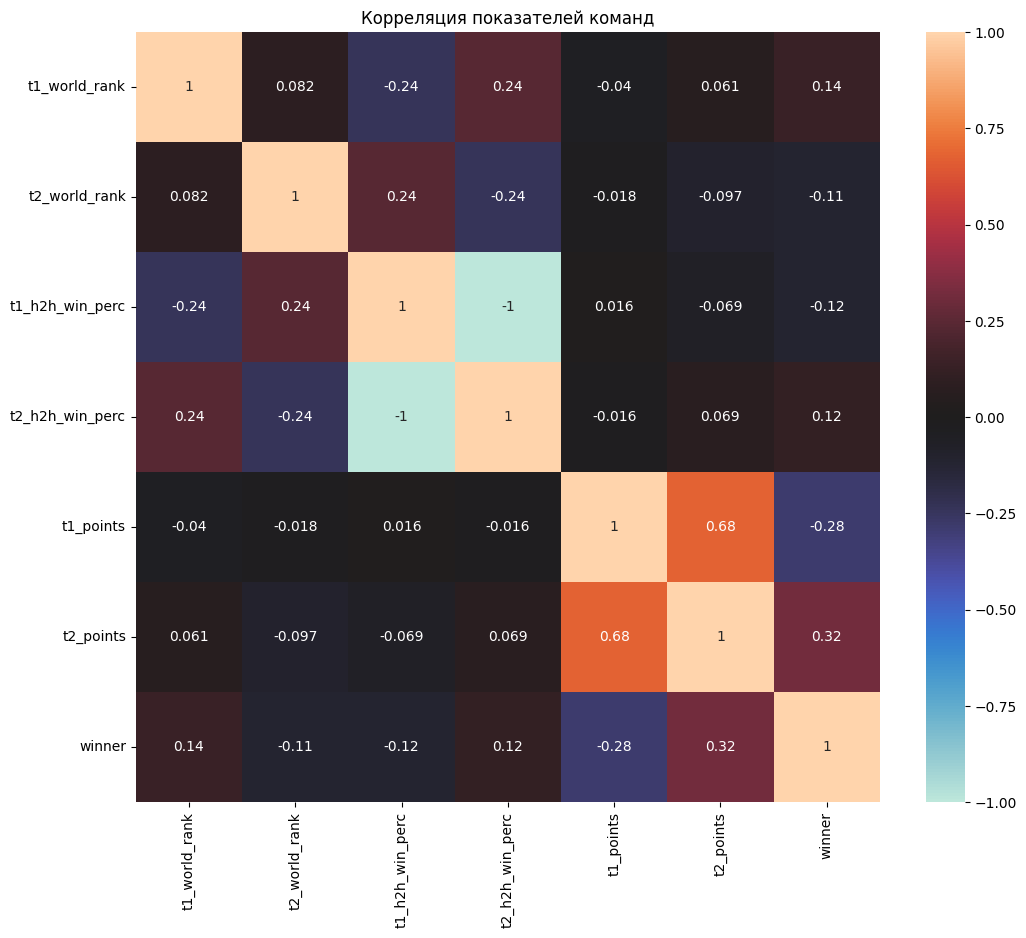

In [16]:
team_features = ['t1_world_rank', 't2_world_rank', 
                't1_h2h_win_perc', 't2_h2h_win_perc',
                't1_points', 't2_points', 
                'winner']
corr_matrix = df[team_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, center=0)
plt.title('Корреляция показателей команд')
plt.show()

Text(0.5, 1.0, 'Корреляция командных показателей с победителем (winner)')

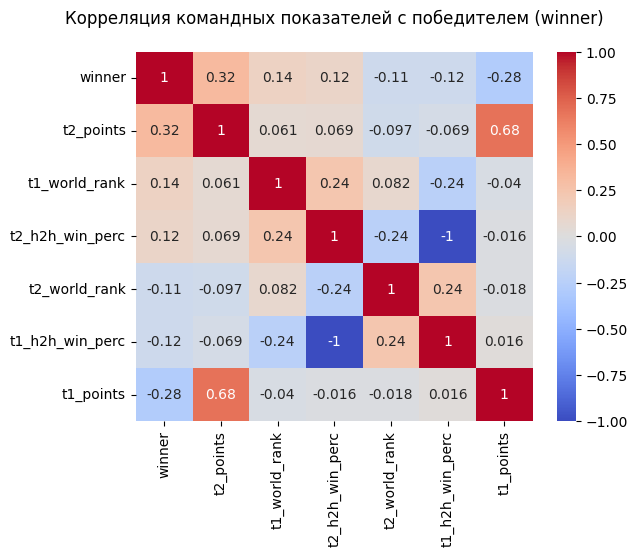

In [ ]:
sorted_corr = corr_matrix['winner'].sort_values(ascending=False)
corr_matrix = corr_matrix.loc[sorted_corr.index, sorted_corr.index]

sns.heatmap(corr_matrix, annot=True, center=0, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция командных показателей с победителем (winner)', pad=20)

**<span style="font-size: 18px;">№1. Пункт - разделение данных</span>**

In [ ]:
def prepare_data(df):
    df_processed = df.copy()
    
    required_cols = ['winner', 't1_points', 't2_points']
    if df_processed[required_cols].isna().any().any():
        df_processed = df_processed.dropna(subset=required_cols)

    y = df_processed['winner']
    y = torch.tensor(y, dtype= torch.long)
    X = df_processed.drop(['winner', 't1_points', 't2_points'], axis=1, errors='ignore')
    
    if pd.DataFrame(X).isna().any().any():
        numeric_cols = X.select_dtypes(include=['number']).columns
        X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

**<span style="font-size: 18px;">№2. Пункт - реализация RBF-слоя</span>**